# <center>BMIN-521-HW2
#### <center>by Keshav Patil@UPenn
---

In [1]:
# Import required library
import numpy as np # scientific computing; https://cs231n.github.io/python-numpy-tutorial/
import pandas as pd # data manipulation and analysis; offers data structures and operations.
import seaborn as sns
import matplotlib.pyplot as plt
import os # interact and get Operating System information 

## Section 1 a

#### Defining a function generate random numbers

In [2]:
def rand_gen(seed,num_of_inputs, dim_of_inputs,a,b):
    np.random.seed(seed)
    inputs = np.around((b-a) * np.random.random_sample((dim_of_inputs, num_of_inputs)) + a, decimals=2)
    return (inputs)

#### Defining the function to perform KNN (K - Nearest Neighbours)

In [3]:
def knn(k,inputs, datapoint):
    s = 0
    dist =  [] # to store the distances of each point in our dataset to each of the pre-known seven points
    for i in range(0,len(inputs[0])):
        dist.append(np.sum(((datapoint - inputs[0:2,i])**2)))
    dist = np.array(dist)
    # Smallest K elements indices 
    # using sorted() + lambda + list slicing 
    res = sorted(range(len(dist)), key = lambda sub: dist[sub])[:k]
    
    for i in range(0,k):
        s = s + inputs[2,res[i]] 
    if s <= 0:
        datapoint_label = -1
    if s > 0:
        datapoint_label = 1
           
    return(datapoint_label)
        
        

In [4]:
# Stacking the dataset alongwith the labels
x1 = np.array([1,0,0,-1,0,0,-2])
x2 = np.array([0,1,-1,0,2,-2,0])
y  = np.array([-1,-1,-1,-1,1,1,1])
inputs = np.vstack((x1,x2,y))
inputs

array([[ 1,  0,  0, -1,  0,  0, -2],
       [ 0,  1, -1,  0,  2, -2,  0],
       [-1, -1, -1, -1,  1,  1,  1]])

#### Defining a function to segregate labels based on classes

In [8]:
def plot_by_group(inputs):
    
    ora_x1 = []
    ora_x2 = []
    blu_x1 = []
    blu_x2 = []
    for i in range(0,len(inputs[0])):
        
        if inputs[2,i] == -1:
            ora_x1.append(inputs[0,i])
            ora_x2.append(inputs[1,i])
            #print(ora_x1)
        if inputs[2,i] == 1:
            blu_x1.append(inputs[0,i])
            blu_x2.append(inputs[1,i])
            #print(blu_x1)
    return(ora_x1,ora_x2,blu_x1,blu_x2)
        

In [9]:
o_x1,o_x2,b_x1,b_x2 = plot_by_group(inputs)

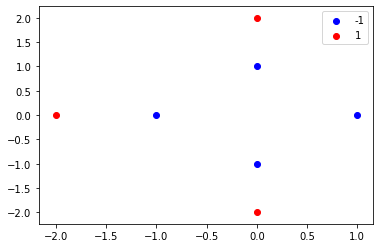

In [10]:
# plotting our dataset of preknown labels for datapoints given in the question 
plt.scatter(o_x1,o_x2,color='blue',label='-1')
plt.scatter(b_x1,b_x2, color='red', label='1')
plt.legend()
plt.show()

#### Perform KNN with k=1

In [11]:
# generate uniform random numbers in the domain x (-3,3)  and y (-3,3) as our dataset. This means a=-3, b=3
a = -3
b = 3
seed = 0
dim_of_inputs = 2
num_of_inputs = 100000
dataset = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)

data_label = []
k = 1

## Determine the KNN 
# Generating a label for each of the point in our datset
for i in range(0,len(dataset[0])):
    
    data_label.append(knn(k,inputs, dataset[:,i]))
    
    
data = np.vstack((dataset,data_label))    
    
o_dlx1,o_dlx2,b_dlx1,b_dlx2 = plot_by_group(data)    
        

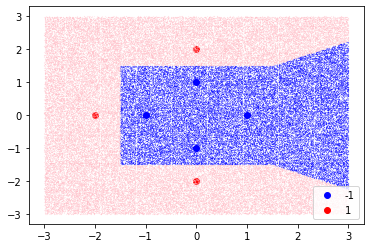

In [12]:
plt.scatter(o_x1,o_x2,color='blue',label='-1',s=35)
plt.scatter(o_dlx1,o_dlx2,color='blue',s=0.01)

plt.scatter(b_x1,b_x2, color='red', label='1',s=35)
plt.scatter(b_dlx1,b_dlx2, color='pink', s=0.01)

plt.legend()

plt.savefig('1(a)1.png')
plt.show()

#### Perform KNN with k=3

In [13]:
# generate uniform random numbers in the domain x (-3,3) and y (-3,3) as our dataset
a=-3
b=3
seed = 0
dim_of_inputs = 2
num_of_inputs = 100000
dataset = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)

data_label = []
k = 3

## Determine the KNN 
# Generating a label for each of the point in our datset
for i in range(0,len(dataset[0])):
    
    data_label.append(knn(k,inputs, dataset[:,i]))
    
    
data = np.vstack((dataset,data_label))    
    
o_dlx1,o_dlx2,b_dlx1,b_dlx2 = plot_by_group(data)    
        

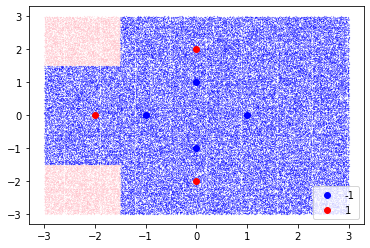

In [14]:
plt.scatter(o_x1,o_x2,color='blue',label='-1',s=35)
plt.scatter(o_dlx1,o_dlx2,color='blue',s=0.01)

plt.scatter(b_x1,b_x2, color='red', label='1',s=35)
plt.scatter(b_dlx1,b_dlx2, color='pink', s=0.01)

plt.legend()

plt.savefig('1(a)2.png')
plt.show()

## Section 1 b

In [29]:
# defining a rectangle that would include the upper disc with 
# x dimension 0 to 2(rad+thk) and 
# y dimension 0 to (rad+thk)
rad = 10
thk = 5
sep = -5
num_of_inputs = 2300 # number set to generate 1000 points in our +1 labelled data
pos_x_u = np.around(2*(rad+thk) * np.random.random_sample(( num_of_inputs)) + 0, decimals=2)
pos_y_u = np.around((rad+thk) * np.random.random_sample(( num_of_inputs)) + 0, decimals=2)

# selecting only the points that fall under the upper disc
for i in range(0,num_of_inputs):
    d = np.sqrt((pos_x_u[i] - (rad+thk))**2 + (pos_y_u[i] - 0)**2)
    if d <= (rad+thk) and d >= rad:
        continue
    else:
        
        pos_x_u[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
        pos_y_u[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
       
pos_x_u = pos_x_u[pos_x_u!= 100*(rad+thk)]
pos_y_u = pos_y_u[pos_y_u!= 100*(rad+thk)]
             

In [30]:
# defining a rectangle that would include the lower disc with 
# x dimension (rad+(thk/2)) to (3rad+(5/2)*thk) and
# y dimension  -(sep+rad+thk) to -(sep) 

rad = 10
thk = 5
sep = -5
num_of_inputs = 2300 # number set to generate 1000 points in our -1 labelled data
pos_x_l = np.around(2*(rad+thk) * np.random.random_sample(( num_of_inputs)) + rad+(thk/2), decimals=2)
pos_y_l = np.around((rad+thk) * np.random.random_sample(( num_of_inputs)) - (sep+rad+thk), decimals=2)


# selecting only the points that fall under the lower disc

for i in range(0,num_of_inputs):
    d = np.sqrt((pos_x_l[i] - (2*rad+(3/2)*thk))**2 + (pos_y_l[i] + sep)**2)
    if d <= (rad+thk) and d >= rad:
        continue
    else:
        
        pos_x_l[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
        pos_y_l[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
       
pos_x_l = pos_x_l[pos_x_l!= 100*(rad+thk)]
pos_y_l = pos_y_l[pos_y_l!= 100*(rad+thk)]

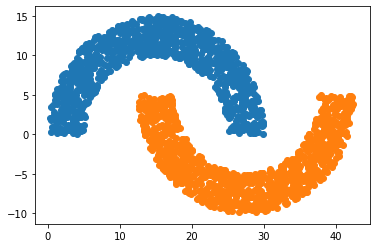

In [31]:
# plotting  our dataset
plt.scatter(pos_x_u,pos_y_u)
plt.scatter(pos_x_l,pos_y_l)
plt.show()

In [32]:
# Stacking our data
pos_x = np.hstack((pos_x_l,pos_x_u))
pos_y = np.hstack((pos_y_l,pos_y_u))
pos = np.vstack((pos_x,pos_y))

pos_label_u = np.ones(len(pos_x_u))
pos_label_l = -np.ones(len(pos_x_l))
pos_label = np.hstack((pos_label_l,pos_label_u))

inputs = np.vstack((pos,pos_label))
inputs

array([[ 3.533e+01,  1.506e+01,  1.761e+01, ...,  3.420e+00,  2.991e+01,
         1.176e+01],
       [-5.620e+00,  1.870e+00,  2.440e+00, ...,  8.200e+00,  3.000e-02,
         1.389e+01],
       [-1.000e+00, -1.000e+00, -1.000e+00, ...,  1.000e+00,  1.000e+00,
         1.000e+00]])

#### Implement the KNN with k = 1

In [33]:
# generate uniform random numbers in the domain x (0,50) and y (-10,20) as our dataset
# x coordinate
a = 0
b = 50
seed = 1
dim_of_inputs = 1
num_of_inputs = 10000
dataset_x = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)


# y coordinate
a = -10
b = 20
seed = 5
dim_of_inputs = 1
num_of_inputs = 10000
dataset_y = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)

dataset = np.vstack((dataset_x, dataset_y))

data_label = []
k = 1
 
## Determine the KNN 
# Generating a label for each of the point in our datset
for i in range(0,len(dataset[0])):
    
    data_label.append(knn(k,inputs, dataset[:,i]))
    
    
data = np.vstack((dataset,data_label))    
    
o_dlx1,o_dlx2,b_dlx1,b_dlx2 = plot_by_group(data)    
        

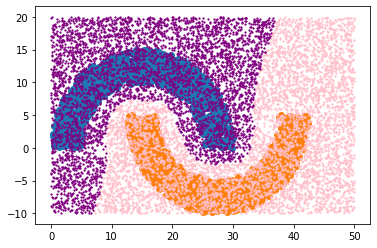

In [34]:
plt.scatter(pos_x_u,pos_y_u)
plt.scatter(pos_x_l,pos_y_l)

plt.scatter(o_dlx1,o_dlx2,color='pink',s=1.5)


plt.scatter(b_dlx1,b_dlx2, color='purple', s=1.5)



plt.savefig('1(b)1.png')
plt.show()

#### Implement the KNN with k = 3

In [35]:
# generate uniform random numbers in the domain x (0,50) and y (-10,20) as our dataset
# x coordinate
a = 0
b = 50
seed = 1
dim_of_inputs = 1
num_of_inputs = 10000
dataset_x = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)


# y coordinate
a = -10
b = 20
seed = 5
dim_of_inputs = 1
num_of_inputs = 10000
dataset_y = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)

dataset = np.vstack((dataset_x, dataset_y))

data_label = []
k = 3
 
## Determine the KNN 
# Generating a label for each of the point in our datset
for i in range(0,len(dataset[0])):
    
    data_label.append(knn(k,inputs, dataset[:,i]))
    
    
data = np.vstack((dataset,data_label))    
    
o_dlx1,o_dlx2,b_dlx1,b_dlx2 = plot_by_group(data)    
        

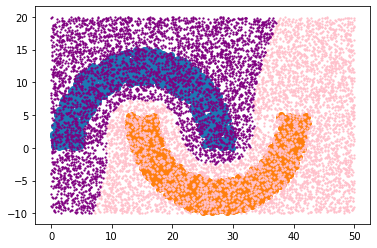

In [36]:
plt.scatter(pos_x_u,pos_y_u)
plt.scatter(pos_x_l,pos_y_l)

plt.scatter(o_dlx1,o_dlx2,color='pink',s=1.5)


plt.scatter(b_dlx1,b_dlx2, color='purple', s=1.5)



plt.savefig('1(b)2.png')
plt.show()

#### Implement the KNN with k = sqrt(N) = sqrt(10000) = 100

In [37]:
# generate uniform random numbers in the domain x (0,50) and y (-10,20) as our dataset
# x coordinate
a = 0
b = 50
seed = 1
dim_of_inputs = 1
num_of_inputs = 10000
dataset_x = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)


# y coordinate
a = -10
b = 20
seed = 5
dim_of_inputs = 1
num_of_inputs = 10000
dataset_y = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)

dataset = np.vstack((dataset_x, dataset_y))

data_label = []
k = 100
 
## Determine the KNN 
# Generating a label for each of the point in our datset
for i in range(0,len(dataset[0])):
    
    data_label.append(knn(k,inputs, dataset[:,i]))
    
    
data = np.vstack((dataset,data_label))    
    
o_dlx1,o_dlx2,b_dlx1,b_dlx2 = plot_by_group(data)   

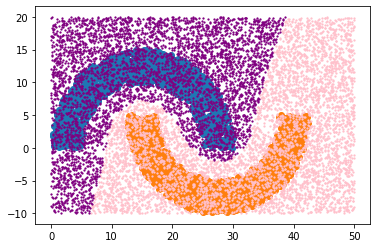

In [38]:
plt.scatter(pos_x_u,pos_y_u)
plt.scatter(pos_x_l,pos_y_l)

plt.scatter(o_dlx1,o_dlx2,color='pink',s=1.5)


plt.scatter(b_dlx1,b_dlx2, color='purple', s=1.5)



plt.savefig('1(b)3.png')
plt.show()

## Section 2 a

#### Generate 3 data points uniformly in upper half of the input space and 3 data points in
#### the lower half, and obtain g_random and g_svm

In [39]:
# The domain is x (-1,1) and y (-1,1)

# 3 datapoints in the upper half so x (-1,1)  and y (0,1) 
# x coordinate
num_of_inputs = 3
a = -1
b = 1
seed = 1
dim_of_inputs = 1
x_data_u = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)

# y coordinate
num_of_inputs = 3
a = 0
b = 1
seed = 5
dim_of_inputs = 1
y_data_u = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)



# 3 datapoints in the lower half so x (-1,1)  and y (-1,0) 
# x coordinate
num_of_inputs = 3
a = -1
b = 1
seed = 3
dim_of_inputs = 1
x_data_l = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)

# y coordinate
num_of_inputs = 3
a = -1
b = 0
seed = 9
dim_of_inputs = 1
y_data_l = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)


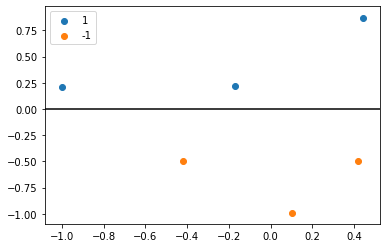

In [40]:
plt.scatter(x_data_u,y_data_u,label='1')
plt.scatter(x_data_l,y_data_l,label='-1')
plt.axhline(y=0, xmin=-1, xmax=1, color='black')
plt.legend()
plt.show()

In [41]:
# g_random
# Here we chose a random 'A' between the lowest point in the upper half and 
# the highest point in the lower half based on y - dimension


a = y_data_l.max()
b = y_data_u.min()
seed = 10
num_of_inputs = 1
dim_of_inputs = 1
A_random = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)
A_random = float(A_random[0])


In [42]:
# g_svm
# Here we chose a specific 'A' which demarcates the maximun separation line
# So here we pick A which is midway between the lowest point in the upper half
# and highest point in the lower half based on y - dimension

A_svm = (y_data_l.max() + y_data_u.min()) / 2


## Section 2 b
#### Plot of our data, and the two hypothesis

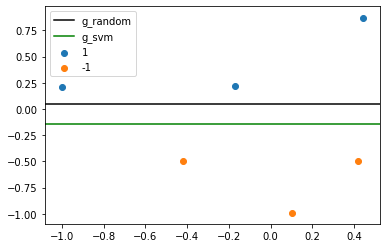

In [43]:
plt.scatter(x_data_u,y_data_u,label='1')
plt.scatter(x_data_l,y_data_l,label='-1')
plt.axhline(y=A_random, xmin=-1, xmax=1, color='black',label='g_random')
plt.axhline(y=A_svm, xmin=-1, xmax=1, color='green',label='g_svm')
plt.legend()
plt.show()

## Section 2 c
#### Repeat part a for 1000 different datasets and create 1000 random 
####  and 1000 SVM hypotheses

In [44]:
dim_of_inputs = 1000
# The domain is x (-1,1) and y (-1,1)

# 3 datapoints in the upper half so x (-1,1)  and y (0,1) 
# x coordinate
num_of_inputs = 3
a = -1
b = 1
seed = 1
x_data_u = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)

#y coordinate
num_of_inputs = 3
a = 0
b = 1
seed = 5
y_data_u = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)



# 3 datapoints in the lower half so x (-1,1)  and y (-1,0) 
# x coordinate
num_of_inputs = 3
a = -1
b = 1
seed = 3
x_data_l = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)

# y coordinate
num_of_inputs = 3
a = -1
b = 0
seed = 9
y_data_l = rand_gen(seed,num_of_inputs, dim_of_inputs,a,b)
    

In [45]:
# g_random
# Here we chose a random 'A' between the lowest point in the upper half and 
# the highest point in the lower half based on y - dimension

A_random = []
for i in range(0,dim_of_inputs):

    a = y_data_l[i].max()
    b = y_data_u[i].min()
    seed = 10
    num_of_inputs = 1    
    A_random.append(float(rand_gen(seed,num_of_inputs, 1,a,b)[0]))
    
# g_svm
# Here we chose a specific 'A' which demarcates the maximun separation line
# So here we pick A which is midway between the lowest point in the upper half
# and highest point in the lower half based on y - dimension
A_svm = []
for i in range(0,dim_of_inputs):
    A_svm.append((y_data_l[i].max() + y_data_u[i].min()) / 2)


## Section 2 d
#### plot of the histograms


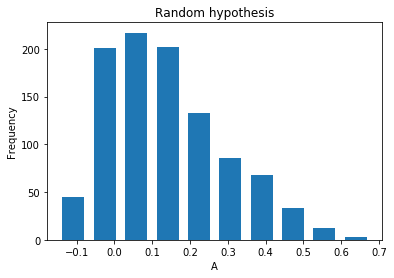

In [46]:

## Histogram of random  hyptheses

plt.hist(A_random, bins=None, range=None, density=False,rwidth=0.7)
plt.ylabel('Frequency')
plt.xlabel('A')
plt.title('Random hypothesis')
plt.savefig('2(d)1.png')

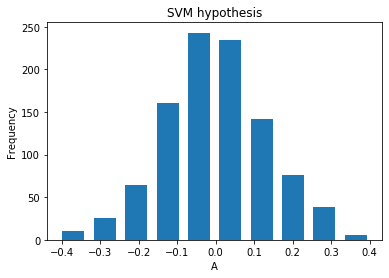

In [47]:
## Histogram of SVM  hyptheses

plt.hist(A_svm, bins=None, range=None, density=False,rwidth=0.7)
plt.ylabel('Frequency')
plt.xlabel('A')
plt.title('SVM hypothesis')
plt.savefig('2(d)2.png')

#### We observe that the variance of the SVM is smaller than the random model as the values seem to 
#### be spread more in the Random model

## Section 3 a

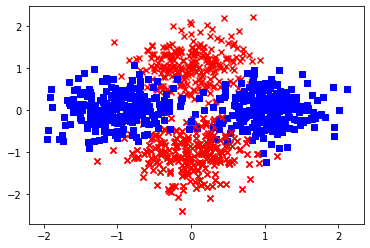

In [88]:
rho = 0.15
cov = [[rho,0], [0,rho]]
num = 250

center_1 = [0,1]
x11,x12 = np.random.multivariate_normal(center_1,cov,num).T
plt.scatter(x11, x12,  marker='x',color='red')
X1 = np.vstack((x11,x12))


center_2 = [0,-1]
x21,x22 = np.random.multivariate_normal(center_2,cov,num).T
plt.scatter(x21, x22,  marker='x',color='red')
X2 = np.vstack((x21,x22))


center_3 = [1,0]
x31,x32 = np.random.multivariate_normal(center_3,cov,num).T
plt.scatter(x31, x32,  marker='s',color='blue')
plt.scatter(x21, x22,  marker='x',color='red')
X3 = np.vstack((x31,x32))

center_4 = [-1,0]
x41,x42 = np.random.multivariate_normal(center_4,cov,num).T
plt.scatter(x41, x42,  marker='s',color='blue')
X4 = np.vstack((x41,x42))


plt.show()


# Assigning the labels

y1 = np.ones(len(x11))
y2 = np.ones(len(x21))

y3 = -np.ones(len(x31))
y4 = -np.ones(len(x41))


In [89]:
y = np.hstack((y1,y2,y3,y4))
X = np.vstack((X1.T,X2.T,X3.T,X4.T))

#### Running the decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Defining and fitting a DecisionTreeClassifier instance
tres = tree.DecisionTreeClassifier(max_depth = 5)
tres.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

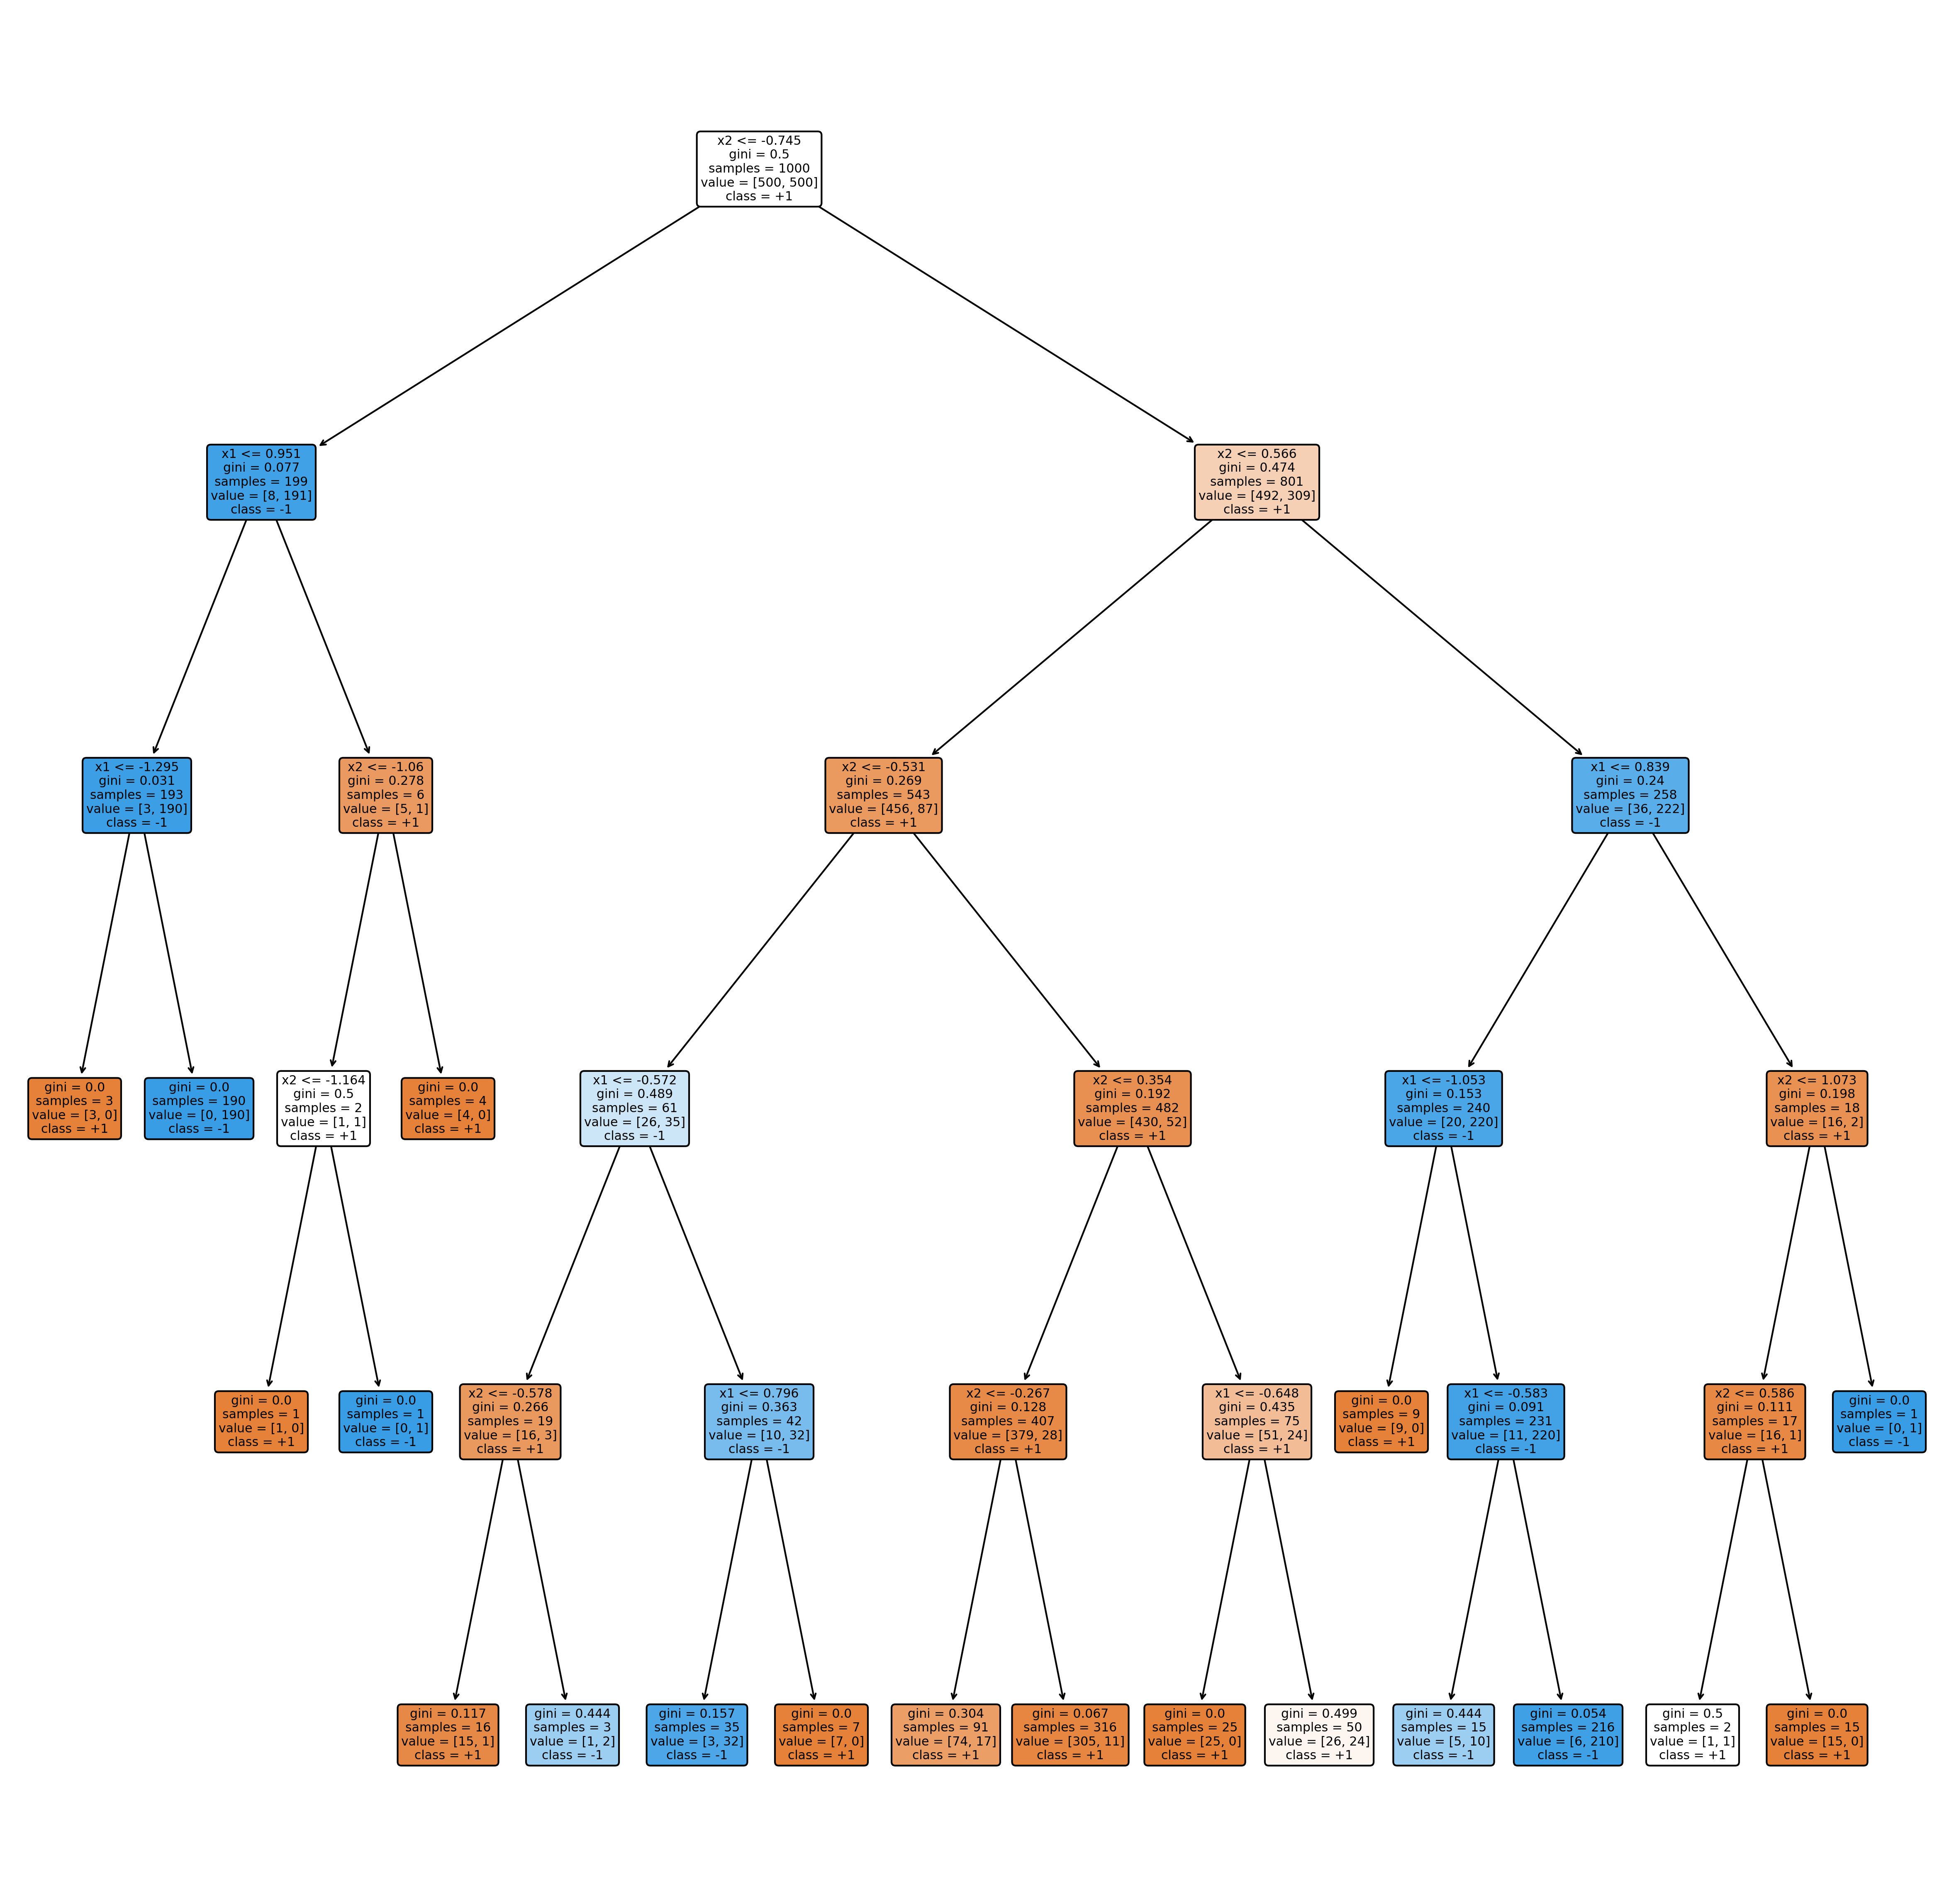

In [99]:
# The 
fn=['x1','x2']
cn=['+1', '-1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(tres)
tree.plot_tree(tres,
               feature_names = fn, 
               class_names=cn,
               filled = True, rounded=True);
fig.savefig('dtree_problem3a.png')

In [100]:

tree.export_graphviz(tres,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

# Please look for a file names tree.png for a better visualization of the decision tree   
# dot -Tpng tree.dot -o tree.png

In [55]:
X.shape


(1000, 2)

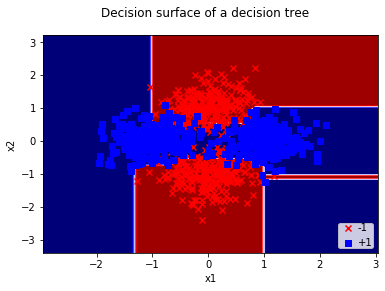

In [101]:
# The following code excerpt is inspired from https://scikit-learn.org/0.18/auto_examples/tree/plot_iris.html

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 2
plot_step = 0.1

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, plot_step),
                     np.arange(x2_min, x2_max, plot_step))


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = tres.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.seismic)

plt.xlabel('x1')
plt.ylabel('x2')
plt.suptitle("Decision surface of a decision tree")
plt.axis("tight")

# Plotting the training data
plt.scatter(x11, x12,  marker='x',color='red', label='-1')
plt.scatter(x21, x22,  marker='x',color='red')
plt.scatter(x31, x32,  marker='s',color='blue', label='+1')
plt.scatter(x41, x42,  marker='s',color='blue')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.savefig('decision_surface_problem3a.png')
plt.show()


## Section 3 b

In [92]:
# Making a pandas dataframe
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y


In [93]:
# Making the train test split
# and then making the train validation split

from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df, test_size=0.1, random_state=0)

train, val = train_test_split(train_val, test_size=0.222, random_state=0) 

In [98]:
train

,x1,x2,y
436,-1.279460,-1.211021,1.0
911,-0.981998,0.302034,-1.0
171,0.711916,1.353289,1.0
967,-0.716105,-0.742904,-1.0
863,-0.618480,0.127656,-1.0
...,...,...,...
936,-0.984012,-0.175291,-1.0
746,1.048721,-0.001669,-1.0
61,0.326564,0.188765,1.0
195,-0.303340,1.536232,1.0


In [97]:
val

,x1,x2,y
887,-1.351933,0.097615,-1.0
484,0.000258,-1.227866,1.0
441,-0.411205,-1.082209,1.0
630,0.337736,-0.698000,-1.0
540,1.648157,-0.223576,-1.0
...,...,...,...
223,-0.423089,0.991103,1.0
4,0.169437,1.500014,1.0
469,0.354290,-1.176424,1.0
959,-0.825812,0.312608,-1.0


In [96]:
test

,x1,x2,y
993,-1.231146,-0.335932,-1.0
859,-1.196249,-0.069777,-1.0
298,-0.122782,-0.493261,1.0
553,1.165191,-0.568752,-1.0
672,1.268206,-0.207709,-1.0
...,...,...,...
485,0.316091,-0.414405,1.0
568,0.296909,-0.395042,-1.0
108,0.063554,1.166930,1.0
367,-0.489357,-0.585815,1.0


In [95]:
def err(y_pred,y_target):
    q = 0 
    for i in range(0,len(y_pred)):
        if y_pred[i] == y_target[i]:
            q = q + 1
    
    err = 1 - (q/len(y_pred))
    return err
        

In [94]:
# Tuning the hyperparameters namely: max_depth, max_leaf_nodes, min_samples_split

max_depth = [2,3,4,5]
min_samples_split = [2,3,4,5]
max_leaf_nodes = [2,3,4,5]
error = []
d = 0 # tuned max_depth
s = 0 # tuned min_samples_split 
n = 0 # tuned max_leaf_nodes
e = 1

for i in range(0,len(max_depth)):
    
    for j in range(0,len(min_samples_split)):
        
        for k in range(0,len(max_leaf_nodes)):
            
            depth = max_depth[i]
            split = min_samples_split[j]
            nodes = max_leaf_nodes[k]
            
                       
            # Creating an instance of the decision tree classifier
            trese = DecisionTreeClassifier(max_depth = depth,  min_samples_split = split,
                              max_leaf_nodes=nodes)
            
            # fitting the model
            trese.fit(train[['x1','x2']],train[['y']])
            
            # predict
            y_val = trese.predict(val[['x1','x2']])
            
            error = err(y_val, np.array(val['y']))
            
            if error < e:
                e = error
                d = depth
                s = split
                n = nodes
    
    
print('The tuned max_depth is {} '.format(d))  
print('The tuned min_samples_split is {}'.format(s))
print('The tuned max_leaf_nodes is {}'.format(n))
print('The validation error is {} '.format(e)) 

####################################################################################
# Validation error

# Creating an instance of the decision tree classifier with tuned hyperparameters
trese = DecisionTreeClassifier(max_depth = d,  min_samples_split = s,
                  max_leaf_nodes=n)

# fitting the model
trese.fit(train[['x1','x2']],train[['y']])

# predict
y_val = trese.predict(val[['x1','x2']])

error = err(y_val, np.array(val['y']))


print('The validation error is {} '.format(error)) 



###############################################################################    
# Training error

# predict
y_train_pred = trese.predict(train[['x1','x2']])

e_train = err(y_train_pred, np.array(train['y']))
                
print('The training error is {} '.format(e_train))     
################################################################################       
################################################################################    
# Test error    

# predict
y_test_pred = trese.predict(test[['x1','x2']])

e_test = err(y_test_pred, np.array(test['y']))   
    
print('The testing error is {} '.format(e_test))     
    
    
    


The tuned max_depth is 3 
The tuned min_samples_split is 2
The tuned max_leaf_nodes is 5
The validation error is 0.11499999999999999 
The validation error is 0.11499999999999999 
The training error is 0.08285714285714285 
The testing error is 0.15000000000000002 


## Section 4 a and 4 b combined

In [102]:
# 500 subsets

e_test = []
y_pred = np.zeros(len(test))
for i in range(0,500):
    t = 100
    index = np.random.choice(train.shape[0], t, replace=False) 
    sub_train = train.iloc[index]
    
    trese_sub_train = DecisionTreeClassifier(max_depth = d,  min_samples_split = s,
                              max_leaf_nodes=n)
    
    
    # fitting the model
    trese_sub_train.fit(sub_train[['x1','x2']],sub_train['y'])
    
    
    #predicting on the test set
    
    y_test_pred = trese_sub_train.predict(test[['x1','x2']])

    e_test.append(err(y_test_pred, np.array(test['y'])))
    
    # appending (stacking) the results i.e. y_test_pred for every decison tree classifier to the respective data
    # point in the test set
    
    y_pred = np.vstack((y_pred, y_test_pred))
    
    

## Section 4 a

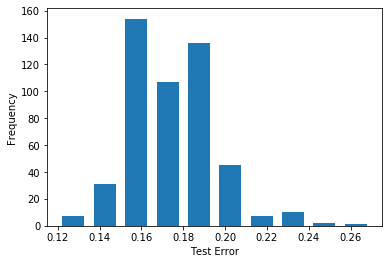

In [103]:
# Plotting the histogram of the test error

plt.hist(e_test, bins=None, range=None, density=False,rwidth=0.7)
plt.ylabel('Frequency')
plt.xlabel('Test Error')
plt.savefig('4(a).png')


In [104]:
# Mean of the test error
from statistics import mean

print('The mean test error is {}'.format(mean(e_test)))


The mean test error is 0.17252


## Section 4 b

In [105]:
freq_pred_test = []
for i in range(0,100):
    w = np.sign(sum(y_pred.T[i]))
    if w == 0:     
        freq_pred_test.append(w-1)    
    else:
        freq_pred_test.append(w)
    

# test error obtained through majority-vote predictions

e_test_maj_vote = err(freq_pred_test, np.array(test['y']))

print('The test error obtained through majority vote prediction is {}'.format(e_test_maj_vote))




The test error obtained through majority vote prediction is 0.09999999999999998


#### It is observed that the test error obtained through majority vote prediction is much smaller than
#### mean over 500 decision trees

## Section 5 a

In [106]:
# Randomly split the data into a training set(70%) and a validation set(20%) and a testing 
# set(10%)
from sklearn.model_selection import train_test_split
data = pd.read_csv("DR.csv") 
train_val, test = train_test_split(data, test_size=0.1, random_state=0)
train, val = train_test_split(train_val, test_size=0.222, random_state=0)  # 2/9 this gives the required split
train


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,Class
684,1,1,52,52,51,48,46,32,22.034077,7.656689,1.393830,0.082817,0.000000,0.000000,0.000000,0.000000,0.507830,0.142196,0,1
658,1,1,40,37,35,33,27,14,60.434860,8.993919,2.792340,0.544623,0.008144,0.000000,0.000000,0.000000,0.490244,0.107907,0,1
746,1,1,53,53,53,53,50,33,27.601364,13.796130,1.879842,0.505236,0.115309,0.000000,0.000000,0.000000,0.548946,0.097102,0,0
707,1,1,19,19,19,17,11,9,34.785186,11.253488,1.742513,0.262251,0.042737,0.007770,0.000000,0.000000,0.530760,0.103929,0,1
393,1,1,72,71,71,68,58,43,54.611185,27.765696,12.301626,7.571765,6.620885,0.940144,0.000000,0.000000,0.484263,0.107357,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1,1,2,2,2,2,2,2,99.758660,38.818198,17.832517,4.718721,0.590341,0.067153,0.000000,0.000000,0.544725,0.104237,1,0
514,1,1,21,20,17,16,12,8,34.886057,12.231702,3.723976,0.748256,0.135399,0.061082,0.000000,0.000000,0.555413,0.097731,1,0
217,1,1,10,10,10,9,7,4,280.315850,28.260464,14.662112,0.400073,0.004135,0.000000,0.000000,0.000000,0.489539,0.128189,1,0
808,1,1,37,35,31,26,24,12,234.413166,71.307899,37.999591,4.739869,0.164371,0.014473,0.011372,0.004135,0.555139,0.109580,1,1


## Section 5 b

In [107]:
# out of bag error = 1 - oob_score_

from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1,oob_score=True)
rnd_clf.fit(train[train.columns[0:19]],train['Class'])
rnd_clf.oob_score_

0.6732919254658385

In [108]:
# out of bag error
print('The our of bag error is {}'.format(1-rnd_clf.oob_score_))

The our of bag error is 0.3267080745341615


In [109]:
# feature importance

rnd_clf.feature_importances_

array([0.00024951, 0.01000177, 0.08888798, 0.06858592, 0.055931  ,
       0.05239803, 0.05469827, 0.05681422, 0.08217402, 0.06600451,
       0.06571043, 0.0627295 , 0.04888363, 0.04014548, 0.05786538,
       0.0458598 , 0.06535791, 0.06770175, 0.0100009 ])

In [110]:
# Sorted feature numbers based on feature importance

features_index = np.argsort(-1*rnd_clf.feature_importances_)[:len(rnd_clf.feature_importances_)]
features_index

array([ 2,  8,  3, 17,  9, 10, 16, 11, 14,  7,  4,  6,  5, 12, 15, 13,  1,
       18,  0])

## Section 5 c

In [111]:
# tuning the knn
# hyperparameters 
# k


k = [1,5,10,15,20,30]
from sklearn.neighbors import KNeighborsClassifier

kn = 0
e  = 1
for i in range(0,len(k)):
    
    kclassifier = KNeighborsClassifier(n_neighbors=k[i])
    kclassifier.fit(train[train.columns[0:19]],train['Class'])

    # predict
    y_val = kclassifier.predict(val[val.columns[0:19]])
            
    error = err(y_val, np.array(val[['Class']]))
            
    if error < e:
        e = error
        kn = k[i]
                
    
    
print('The tuned k for knn is {} '.format(kn))  
print('The validation error from knn is {}'.format(e))



################################################################################################
#################################################################################################
####-----Test Error-------#######################

# Creating an instance of the decision tree classifier with tuned hyperparameters
kclassifier = KNeighborsClassifier(n_neighbors=kn)
   
    
# Fit the model    
kclassifier.fit(train[train.columns[0:19]],train['Class'])


# predict
y_test_knn = kclassifier.predict(test[test.columns[0:19]])

error = err(y_test_knn, np.array(test['Class']))


print('The test error from KNN  is {} '.format(error)) 


The tuned k for knn is 20 
The validation error from knn is 0.31739130434782614
The test error from KNN  is 0.2931034482758621 


In [118]:
# This takes a longwhile ~ 30 mins to run 
# tuning the svm
# hyperparameters
# C and gamma
# Linear or rbf

from sklearn.svm import SVC 

C_value =  [100,1000]
gamma_value = [0.1, 0.01]
kernel_value =  ['linear','rbf']
e = 1
C_n = 0 # tuned C
gamma_n = 0 # tuned gamma 
kernel_n = 0 # tuned kernel type

for i in range(0,len(C_value)):
    
    for j in range(0,len(gamma_value)):
        
        for k in range(0,len(kernel_value)):
            
            CC = C_value[i]
            gammaC = gamma_value[j]
            kernelC = kernel_value[k]
            
            # train the model on train set 
            model = SVC(C=CC, kernel=kernelC, gamma=gammaC) 
            model.fit(train[train.columns[0:19]],train['Class']) 
            
            
            # predict
            y_val = model.predict(val[val.columns[0:19]])
            
            error = err(y_val, np.array(val[['Class']]))
            
            if error < e:
                e = error
                C_n = CC
                gamma_n = gammaC
                kernel_n = kernelC
            
            

print('The tuned C for SVM is {} '.format(C_n))  
print('The tuned gamma for SVM is {}'.format(gamma_n))
print('The tuned kernel for SVM is {}'.format(kernel_n))
print('The validation error for SVM is {}'.format(error))



################################################################################################
#################################################################################################
####-----Test Error-------#######################


# train the model on train set  with tuned hyperparameters
model = SVC(C=C_n, kernel=kernel_n, gamma=gamma_n) 
model.fit(train[train.columns[0:19]],train['Class']) 
# predict
y_test_svm = model.predict(test[test.columns[0:19]])

error = err(y_test_svm, np.array(test['Class']))


print('The test error from SVM  is {} '.format(error)) 



The tuned C for SVM is 100 
The tuned gamma for SVM is 0.1
The tuned kernel for SVM is linear
The validation error for SVM is 0.36086956521739133
The test error from SVM  is 0.2931034482758621 


In [113]:
# tuning the random forest 
# hyperparameters
# number of trees
# maximum depth
# minimum sample split
# max_leaf_nodes 

n_estimators = [100,200,300,400]
max_depth = [2,3,4,5]
min_samples_split = [2,3,4,5]
max_leaf_nodes = [2,3,4,5]
error = []
d = 0 # tuned max_depth
s = 0 # tuned min_samples_split 
n = 0 # tuned max_leaf_nodes
e = 1
for t in range(0,len(n_estimators)):
    
    for i in range(0,len(max_depth)):

        for j in range(0,len(min_samples_split)):

            for k in range(0,len(max_leaf_nodes)):

                depth = max_depth[i]
                split = min_samples_split[j]
                nodes = max_leaf_nodes[k]
                n_est = n_estimators[t]

                # Creating an instance of the random forest classifier
                rnd_clf = RandomForestClassifier(n_estimators=n_est,n_jobs=-1,oob_score=True,max_depth=depth, 
                                                 min_samples_split=split, max_leaf_nodes=nodes)
                rnd_clf.fit(train[train.columns[0:19]],train['Class'])

                # predict
                y_val = rnd_clf.predict(val[val.columns[0:19]])

                error = err(y_val, np.array(val[['Class']]))

                if error < e:
                    e = error
                    d = depth
                    s = split
                    n = nodes
                    n_e = n_est
    
    
print('The tuned max_depth is {} '.format(d))  
print('The tuned min_samples_split is {}'.format(s))
print('The tuned max_leaf_nodes is {}'.format(n))
print('The tuned n_estimators is {}'.format(n_e))
print('The validation error is {} '.format(e)) 

####################################################################################
################################################################################       
################################################################################    
# Test error 

# train the model on train set  with tuned hyperparameters
rnd_clf = RandomForestClassifier(n_estimators=n_e,n_jobs=-1,oob_score=True,max_depth=d, 
                                                 min_samples_split=s, max_leaf_nodes=n)
rnd_clf.fit(train[train.columns[0:19]],train['Class'])

# predict
y_test_rf = rnd_clf.predict(test[test.columns[0:19]])

error = err(y_test_rf, np.array(test['Class']))   
    
print('The testing error from Random Forest is {} '.format(error))


The tuned max_depth is 3 
The tuned min_samples_split is 5
The tuned max_leaf_nodes is 5
The tuned n_estimators is 100
The validation error is 0.31304347826086953 
The testing error from Random Forest is 0.3362068965517241 


In [130]:
# Ensemble majority voting predictions


y_pred = np.vstack((y_test_knn, y_test_svm, y_test_rf )).T

freq_pred_test = []
for i in range(0,len(test)):
    w = np.bincount(y_pred[i]).argmax()
    freq_pred_test.append(w)
    

# test error obtained through majority-vote predictions

e_test_maj_vote = err(freq_pred_test, np.array(test['Class']))

print('The test error obtained through majority vote prediction is {}'.format(e_test_maj_vote))




The test error obtained through majority vote prediction is 0.2844827586206896


# <center>THE END